In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
x, y = mglearn.datasets.make_wave(n_samples=100)

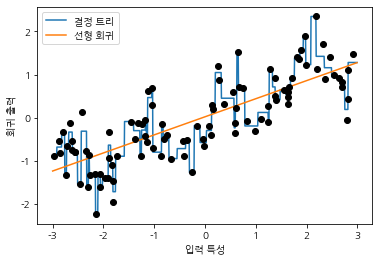

In [3]:
tree = DecisionTreeRegressor(min_samples_split=3).fit(x, y)
lr = LinearRegression().fit(x, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

plt.plot(line, tree.predict(line), label='결정 트리')
plt.plot(line, lr.predict(line), label='선형 회귀')
plt.plot(x[:,0], y, 'o', c='k')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')

In [4]:
bins = np.linspace(-3, 3, 11)
print('구간 : {}'.format(bins))

구간 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [5]:
which_bin = np.digitize(x, bins=bins)
print('\n데이터 포인트 : \n', x[:5])
print("\n데이터 포인트의 소속 구간 : \n", which_bin[:5])


데이터 포인트 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간 : 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [6]:
encoder = OneHotEncoder(sparse=False)

In [7]:
encoder.fit(which_bin)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [8]:
x_binned = encoder.transform(which_bin)
x_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

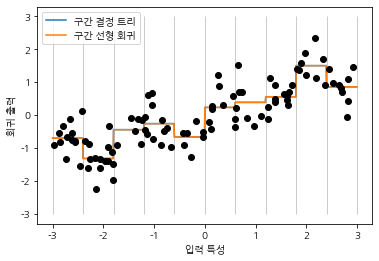

In [9]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

tree = DecisionTreeRegressor(min_samples_split=3).fit(x_binned, y)
lr = LinearRegression().fit(x_binned, y)

plt.plot(line, tree.predict(line_binned), label='구간 결정 트리')
plt.plot(line, lr.predict(line_binned), label='구간 선형 회귀')
plt.plot(x[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')